# Field Experiments - Day 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
def read_csv_file(filename):
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:

        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)
    data = [float(x) for x in rows[0]]
    return data

In [6]:
os.getcwd()


'd:\\IST\\5 ano\\2 semestre\\Tese\\raspberry-grasping\\data\\Real raspberry trials'

In [3]:
os.chdir('Real Raspberry trials')
base_dir = os.getcwd()
base_dir

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Real Raspberry trials'

In [117]:
os.chdir('D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Real Raspberry trials')
dir_H = 'High Force'
dir_L = 'Low Force'
dir_M = 'Medium Force'
dirs = [dir_L, dir_M, dir_H]
force_lvl = ['L', 'M', 'H']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
folders = ['Compression Force', 'Gripper Positions', 'Init_and_final_pos', 'Pulling Force Gripper', 'Time Vectors']
base_dir = os.getcwd()
base_dir

In [19]:
os.chdir('D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Real Raspberry trials')
dir_H = 'High Force wo K2'
dir_L = 'Low Force wo K2'
dir_M = 'Medium Force wo K2'
dirs = [dir_L, dir_M, dir_H]
force_lvl = ['labLwoK2', 'labMwoK2', 'labHwoK2']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
folders = ['Compression Force', 'Gripper Positions', 'Init and final pos', 'Pulling Force', 'Time Vectors']
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\raspberry-grasping\\data\\Real Raspberry trials'

In [20]:
for j, directory in enumerate(dirs):
    os.chdir(directory)
    current_dir = os.getcwd()
    for i, folder in enumerate(folders):
        
        data = []
        for k, file in enumerate(os.listdir(folder)):
            data.append(read_csv_file(base_dir+'/'+directory+'/'+folder+'/'+file))
        locals()[files[i]+force_lvl[j]] = data
    os.chdir(base_dir)

### Without K2 Lab

## Low Force

In [21]:
data = pull_forcelabLwoK2
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

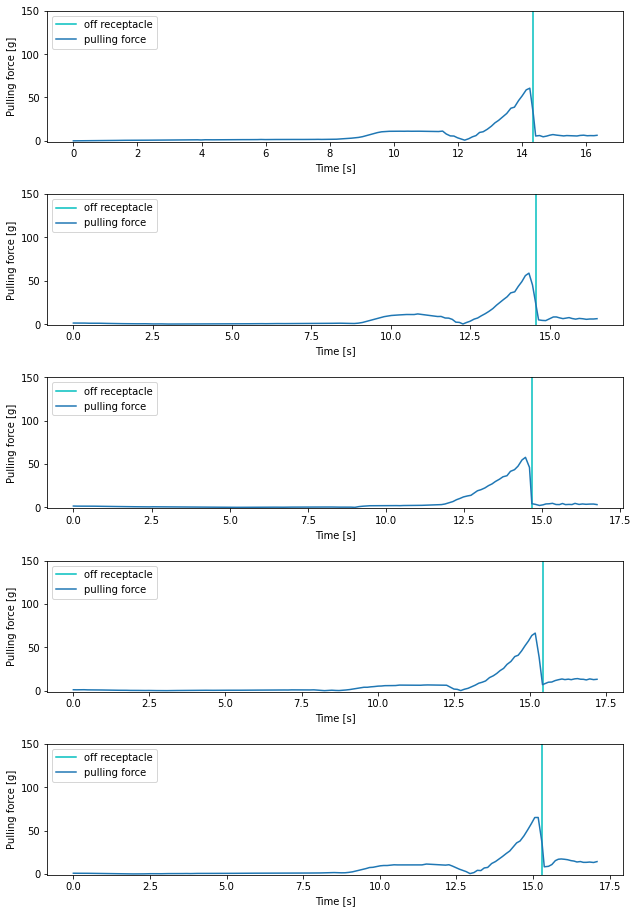

In [22]:
fig, axs = plt.subplots(len(pull_forcelabLwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forcelabLwoK2):
    plottime = np.array(time_vectorlabLwoK2[i])-time_vectorlabLwoK2[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

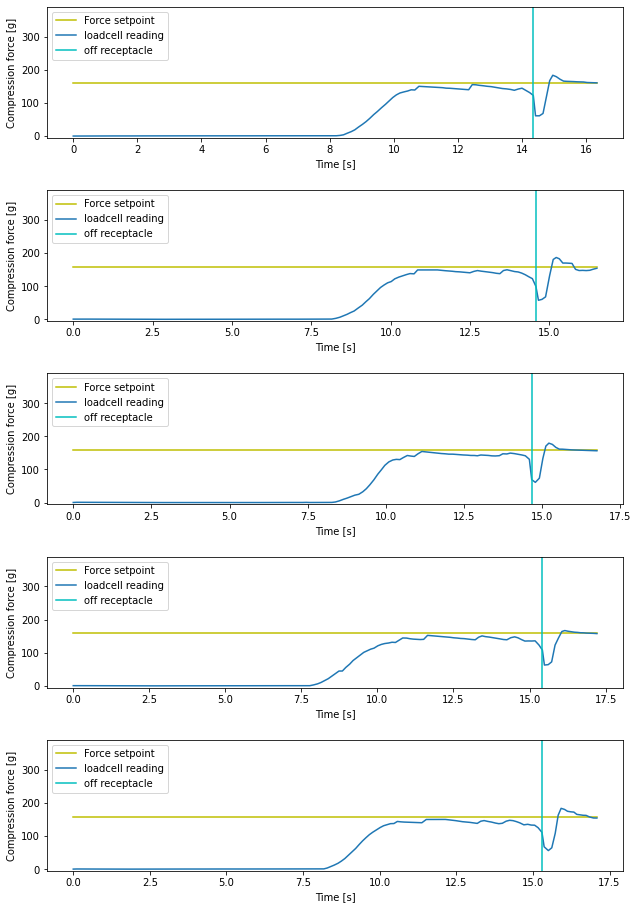

In [25]:
fig, axs = plt.subplots(len(comp_forcelabLwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forcelabLwoK2):
    plottime = np.array(time_vectorlabLwoK2[i])-time_vectorlabLwoK2[i][0]
    Fd_vector = np.ones_like(vec)*Fd[0]
    # Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

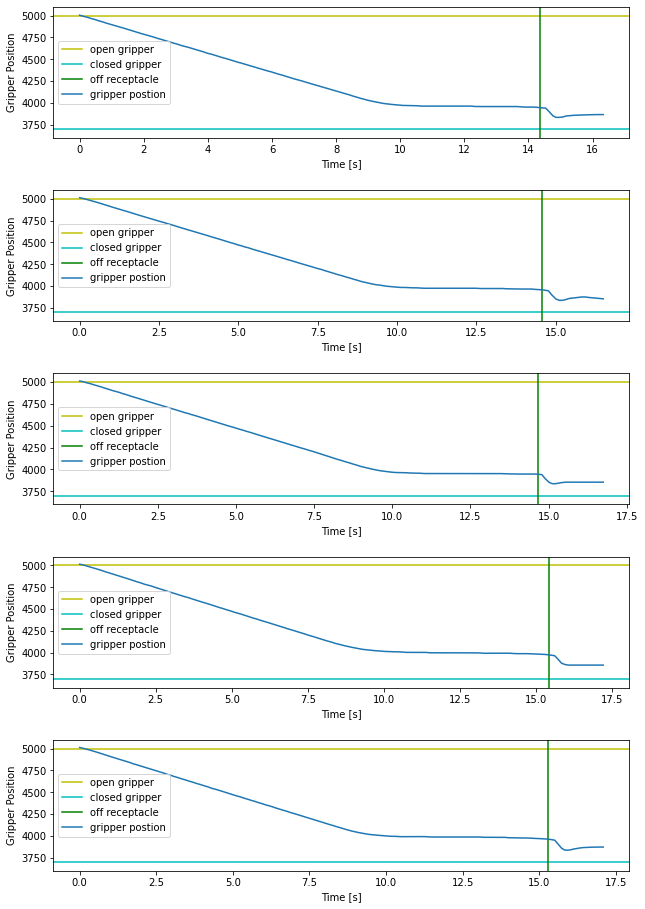

In [29]:
open_pos = 5000
closed_pos = 3700

fig, axs = plt.subplots(len(comp_forcelabLwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(gripper_poslabLwoK2):
    plottime = np.array(time_vectorlabLwoK2[i])-time_vectorlabLwoK2[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3600, 5100])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Medium Force

In [31]:
data = pull_forcelabMwoK2
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

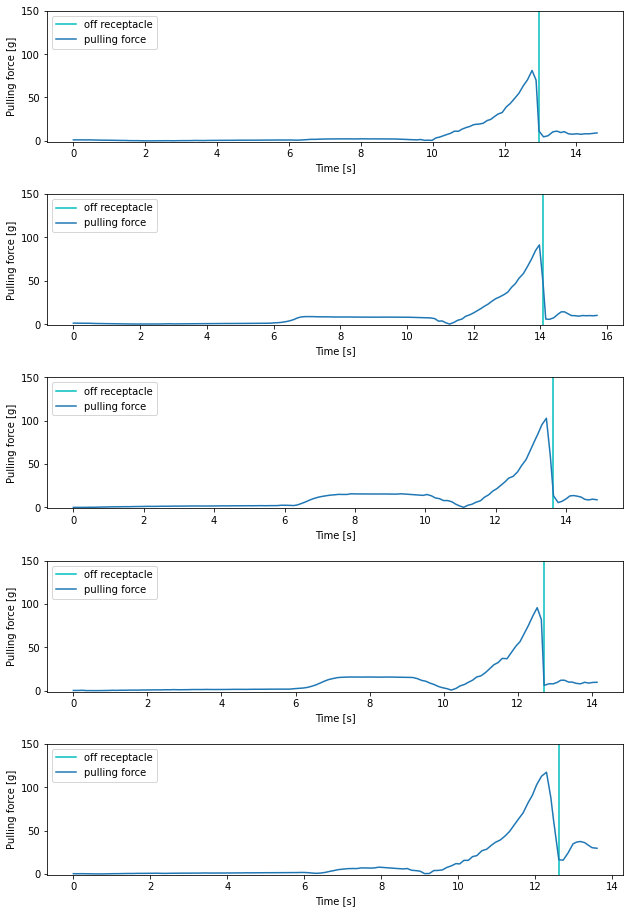

In [32]:
fig, axs = plt.subplots(len(pull_forcelabMwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forcelabMwoK2):
    plottime = np.array(time_vectorlabMwoK2[i])-time_vectorlabMwoK2[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

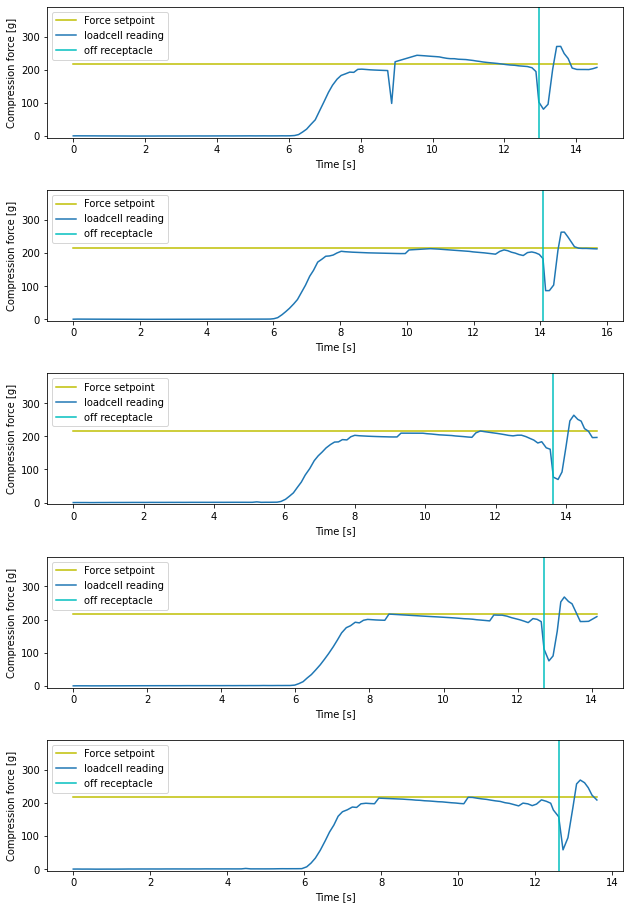

In [35]:
fig, axs = plt.subplots(len(comp_forcelabMwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forcelabMwoK2):
    plottime = np.array(time_vectorlabMwoK2[i])-time_vectorlabMwoK2[i][0]
    Fd_vector = np.ones_like(vec)*Fd[1]
    # Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].legend(loc="upper left")

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

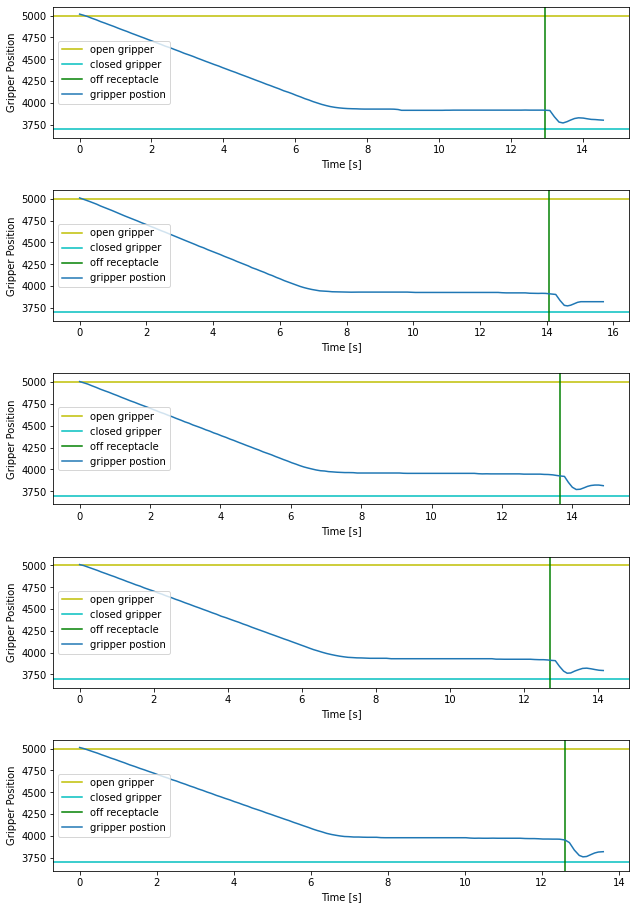

In [40]:
open_pos = 5000
closed_pos = 3700

fig, axs = plt.subplots(len(comp_forcelabMwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(gripper_poslabMwoK2):
    plottime = np.array(time_vectorlabMwoK2[i])-time_vectorlabMwoK2[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3600, 5100])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## High Force

In [41]:
data = pull_forcelabHwoK2
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

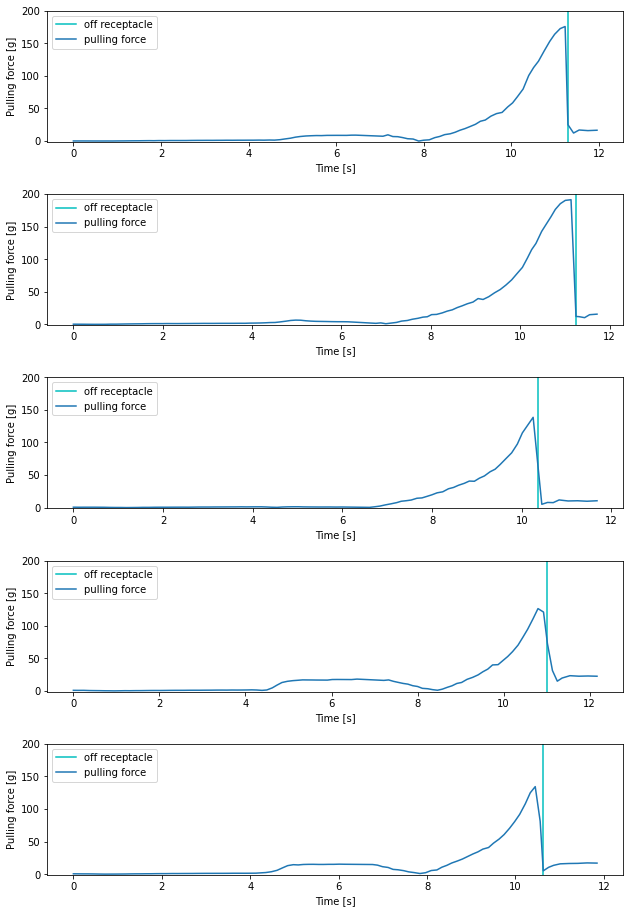

In [43]:
fig, axs = plt.subplots(len(pull_forcelabHwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forcelabHwoK2):
    plottime = np.array(time_vectorlabHwoK2[i])-time_vectorlabHwoK2[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 200])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

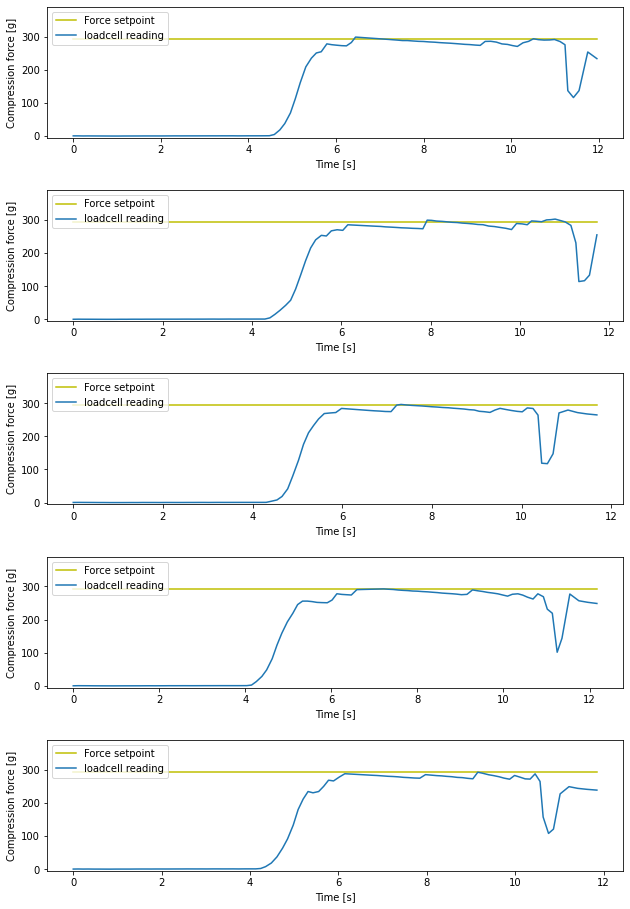

In [45]:
fig, axs = plt.subplots(len(comp_forcelabHwoK2), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forcelabHwoK2):
    plottime = np.array(time_vectorlabHwoK2[i])-time_vectorlabHwoK2[i][0]
    Fd_vector = np.ones_like(vec)*Fd[2]
    # Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

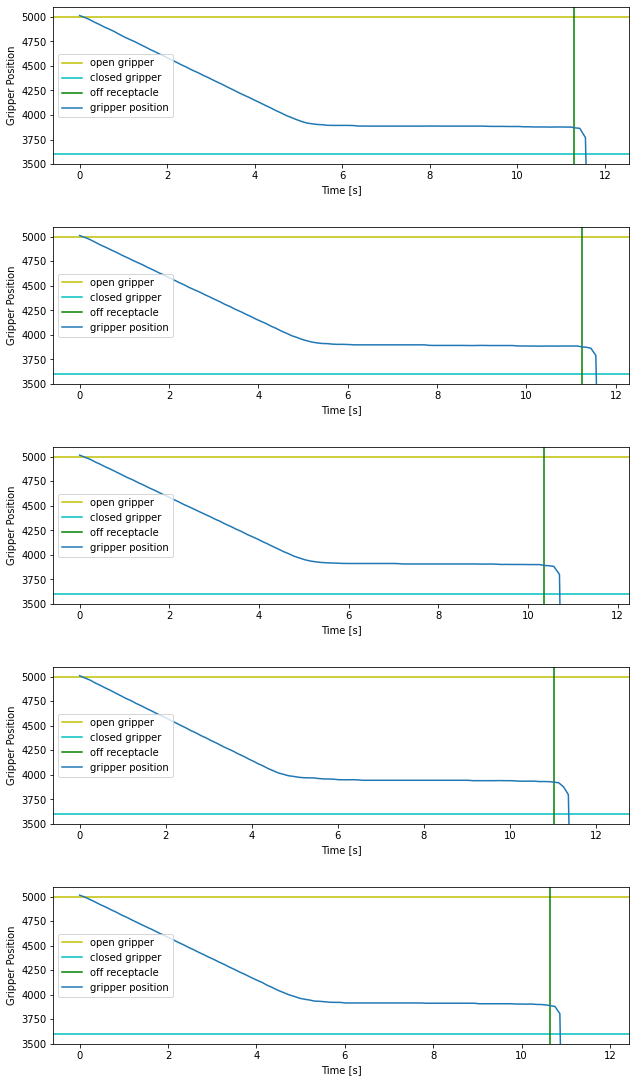

: 

In [46]:
open_pos = 5000
closed_pos = 3600

fig, axs = plt.subplots(len(comp_forcelabHwoK2), 1)
fig.set_size_inches(10,18)
for i,vec in enumerate(gripper_poslabHwoK2):
    plottime = np.array(time_vectorlabHwoK2[i])-time_vectorlabHwoK2[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper position')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3500, 5100])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Lab training results

## Low Force

In [119]:
data = pull_forceL
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

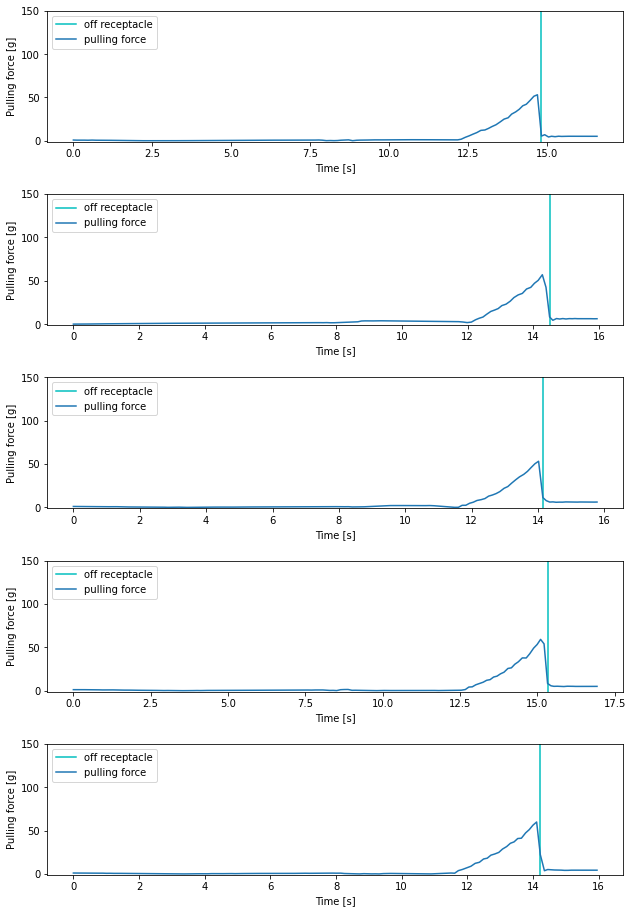

In [120]:
fig, axs = plt.subplots(len(pull_forceL), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forceL):
    plottime = np.array(time_vectorL[i])-time_vectorL[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

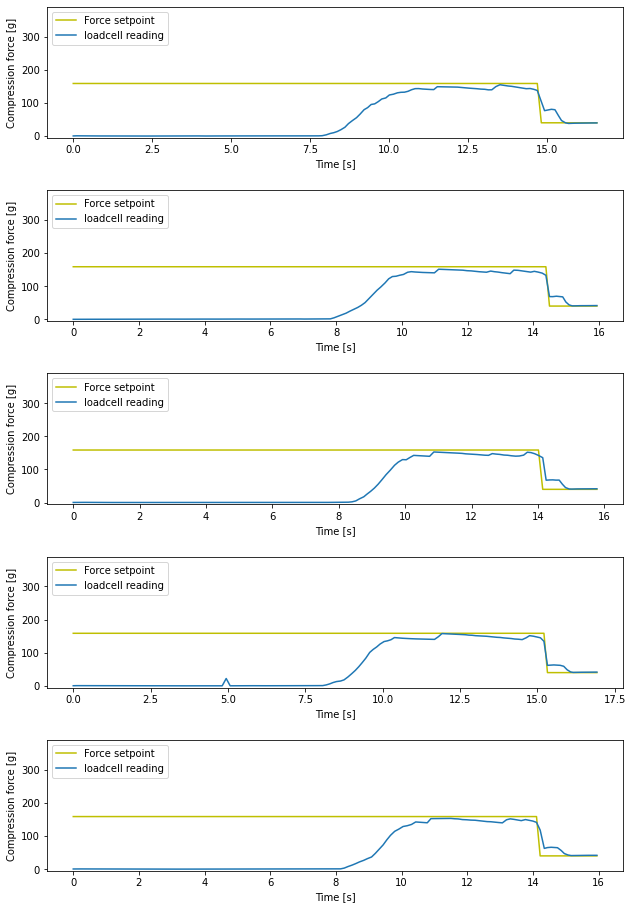

In [121]:
fig, axs = plt.subplots(len(comp_forceL), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forceL):
    plottime = np.array(time_vectorL[i])-time_vectorL[i][0]
    Fd_vector = np.ones_like(vec)*Fd[0]
    Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

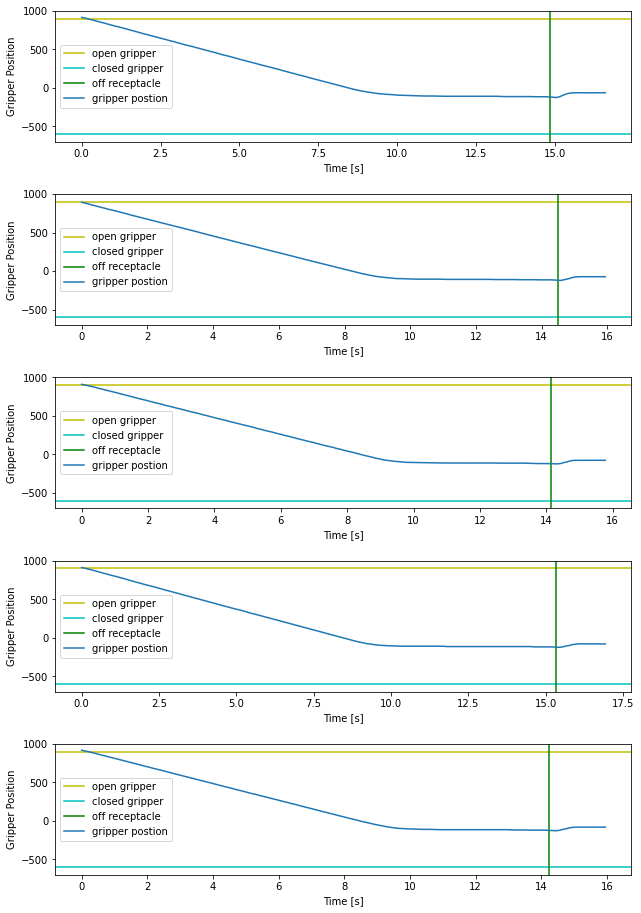

In [122]:
open_pos = 900
closed_pos = -600

fig, axs = plt.subplots(len(comp_forceL), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(gripper_posL):
    plottime = np.array(time_vectorL[i])-time_vectorL[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([-700, 1000])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Medium Force

In [123]:
data = pull_forceM
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

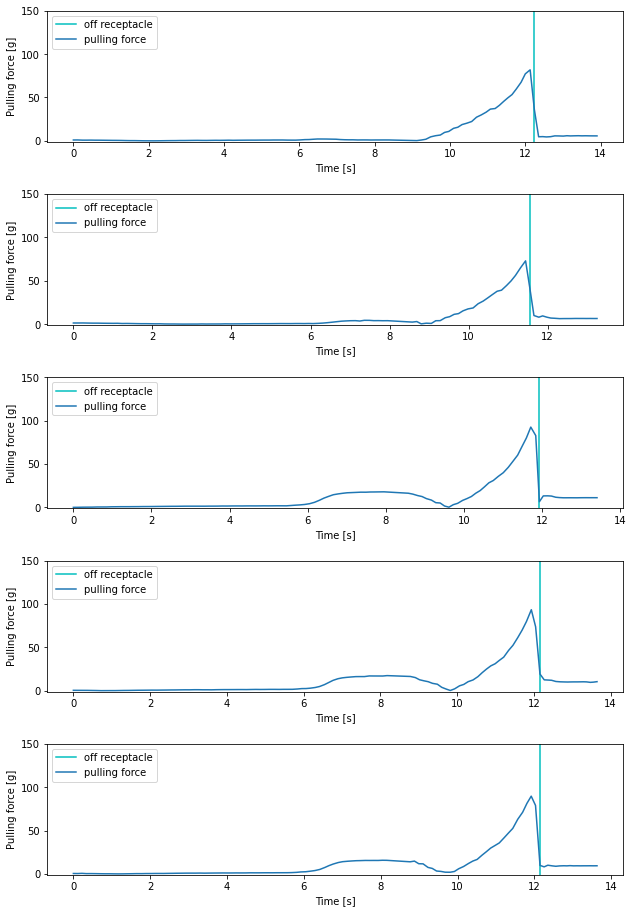

In [124]:
fig, axs = plt.subplots(len(pull_forceM), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forceM):
    plottime = np.array(time_vectorM[i])-time_vectorM[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

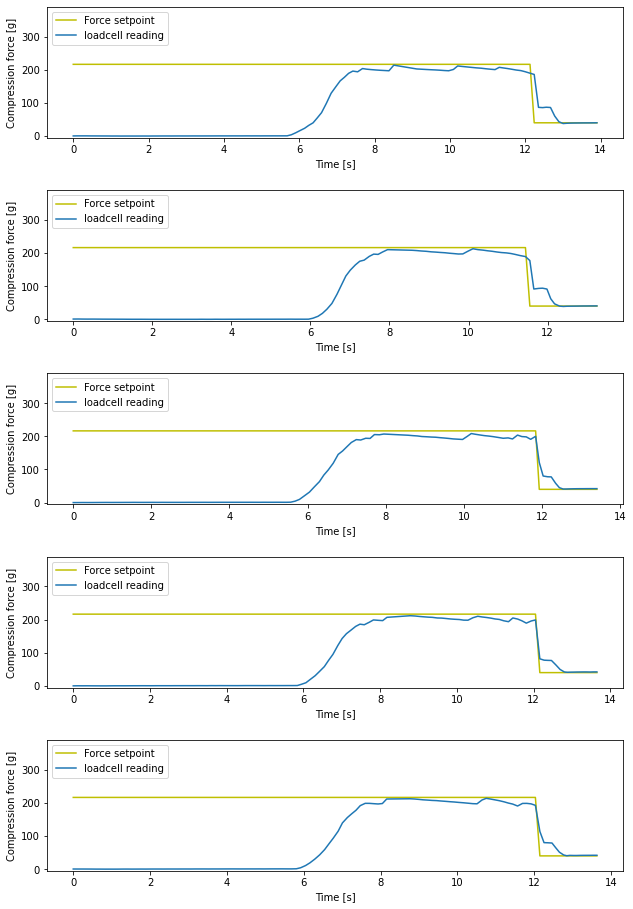

In [125]:
fig, axs = plt.subplots(len(comp_forceM), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forceM):
    plottime = np.array(time_vectorM[i])-time_vectorM[i][0]
    Fd_vector = np.ones_like(vec)*Fd[1]
    Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].legend(loc="upper left")

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

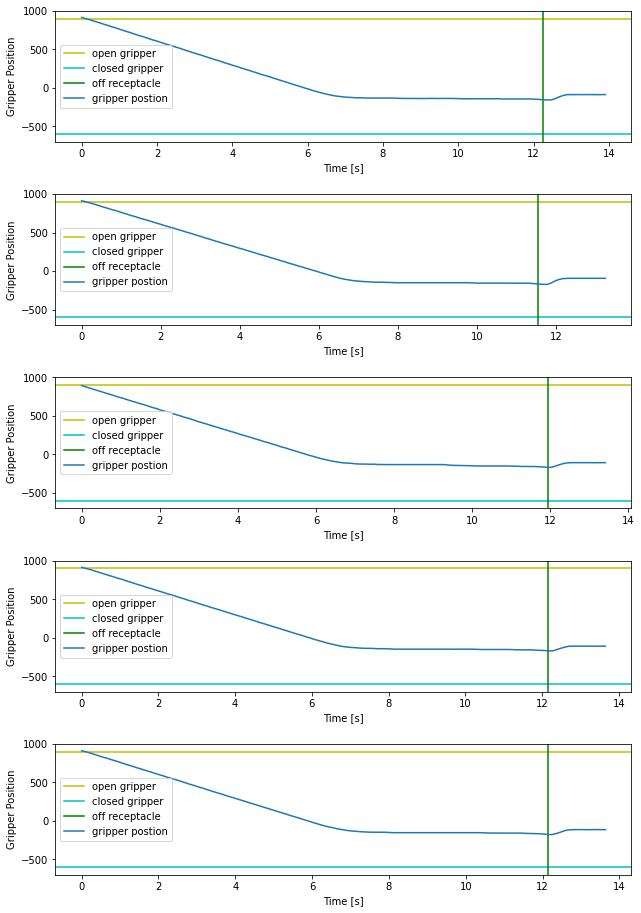

In [126]:
open_pos = 900
closed_pos = -600

fig, axs = plt.subplots(len(comp_forceM), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(gripper_posM):
    plottime = np.array(time_vectorM[i])-time_vectorM[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([-700, 1000])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## High Force

In [127]:
data = pull_forceH
offstem_idx = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)

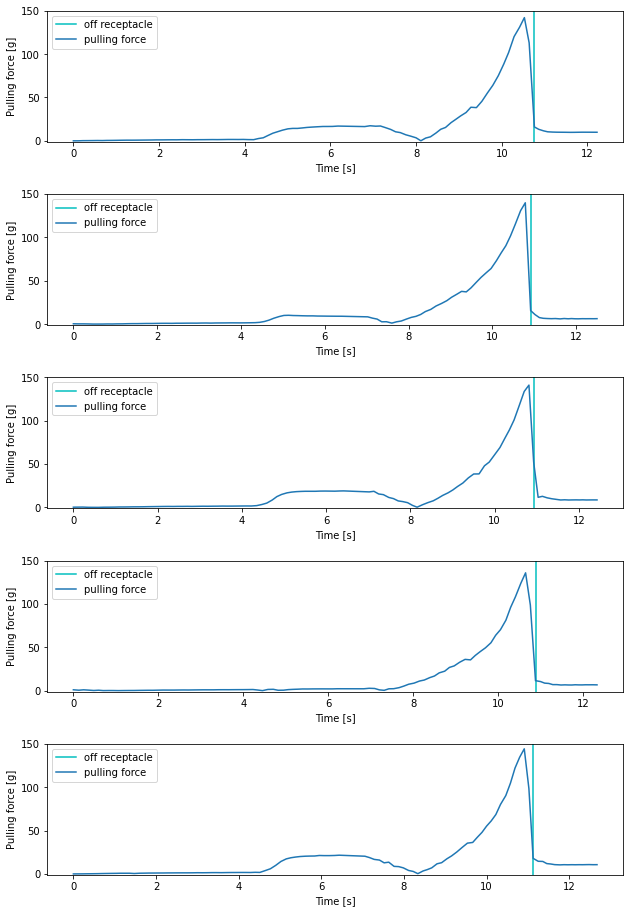

In [128]:
fig, axs = plt.subplots(len(pull_forceH), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(pull_forceH):
    plottime = np.array(time_vectorH[i])-time_vectorH[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off receptacle')
    axs[i].plot(plottime, vec, label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

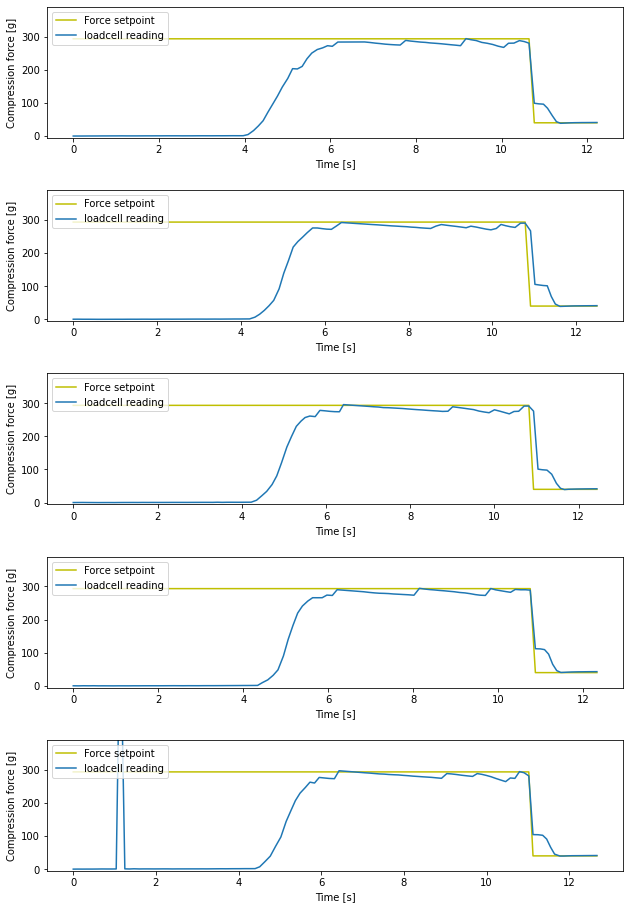

In [129]:
fig, axs = plt.subplots(len(comp_forceH), 1)
fig.set_size_inches(10,15)
for i,vec in enumerate(comp_forceH):
    plottime = np.array(time_vectorH[i])-time_vectorH[i][0]
    Fd_vector = np.ones_like(vec)*Fd[2]
    Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, vec, label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

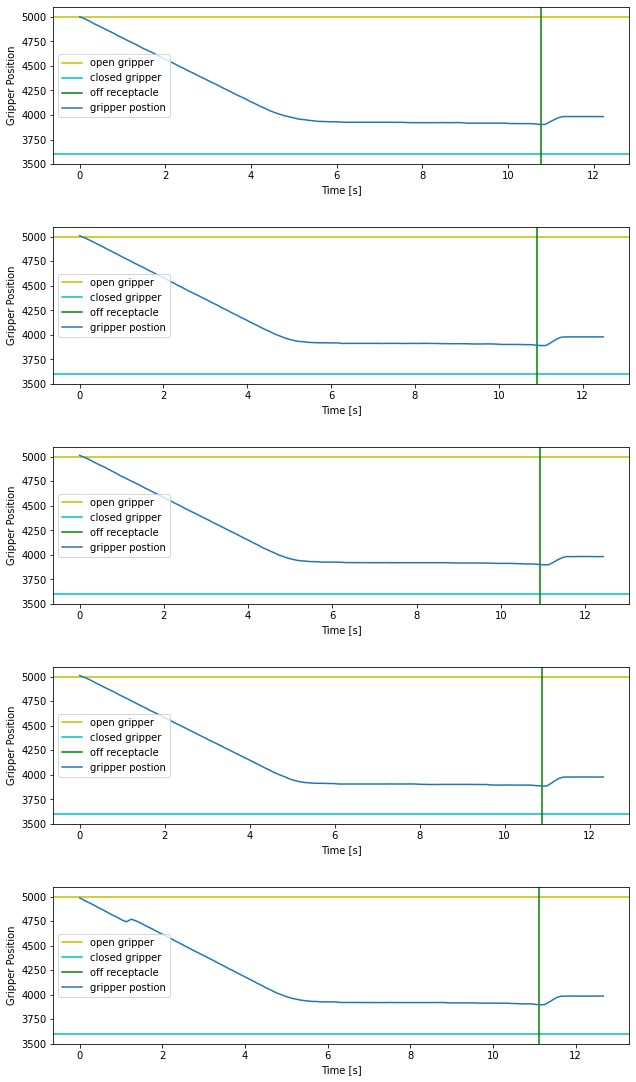

In [130]:
open_pos = 5000
closed_pos = 3600

fig, axs = plt.subplots(len(comp_forceH), 1)
fig.set_size_inches(10,18)
for i,vec in enumerate(gripper_posH):
    plottime = np.array(time_vectorH[i])-time_vectorH[i][0]
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off receptacle')
    axs[i].plot(plottime, vec, label='gripper position')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3500, 5100])
    # axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Day 2 Harvesting Results

## With controller 2

### Gripper pulling force

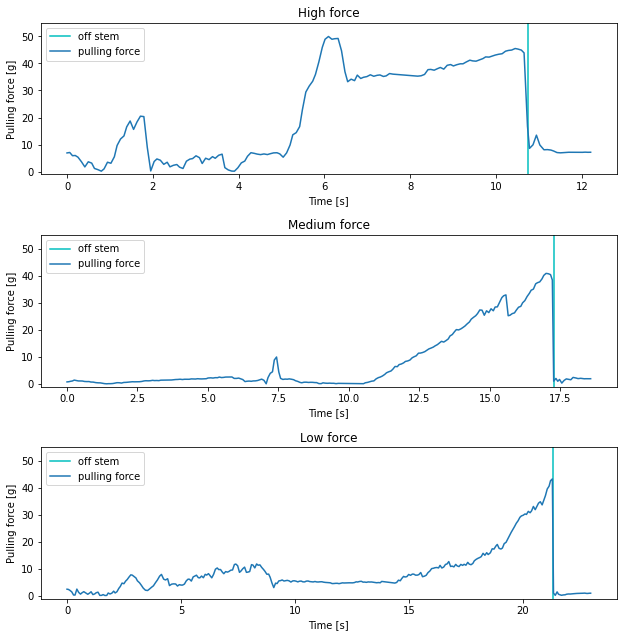

In [178]:
titles = ['High force', 'Medium force', 'Low force']
data = [pull_forceHwK2, pull_forceMwK2, pull_forceLwK2]
times = [time_vectorHwK2, time_vectorMwK2, time_vectorLwK2]
offstem_idx = []

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)
    plottime = np.array(times[i])-times[i][0]
    axs[i].axvline(x = plottime[offstem], color = 'c',label='off stem')
    axs[i].plot(plottime, data[i], label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 55])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Gripper compressive force

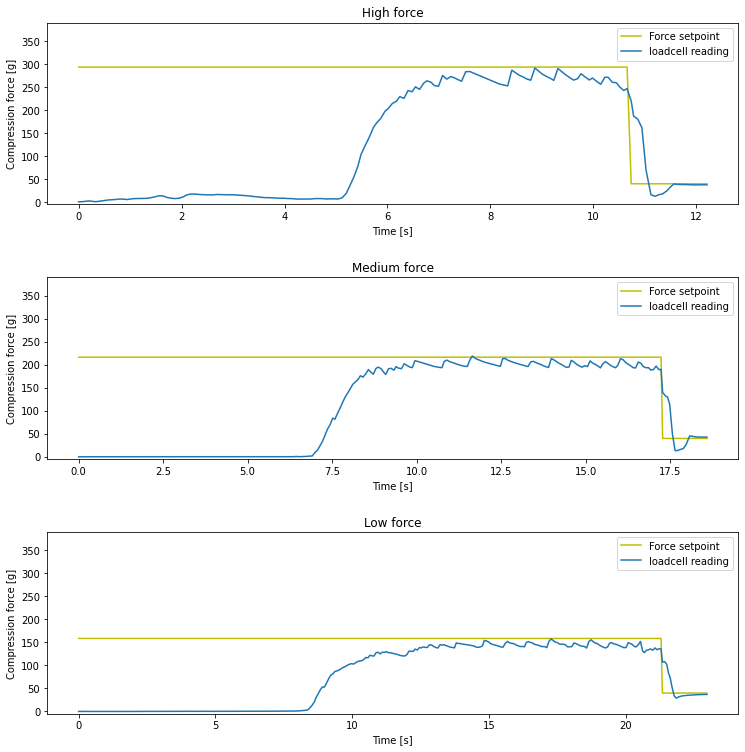

In [179]:
titles = ['High force', 'Medium force', 'Low force']
data = [comp_forceHwK2, comp_forceMwK2, comp_forceLwK2]
times = [time_vectorHwK2, time_vectorMwK2, time_vectorLwK2]

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(12,12)
for i in range(3):
    Fd_vector = np.ones_like(data[i])*Fd[i]
    Fd_vector[offstem_idx[i]::] = 40
    # axs[i].axhline(y = Fd[i], color = 'y', label = 'axhline - full height')
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, data[i], label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 390])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Gripper position

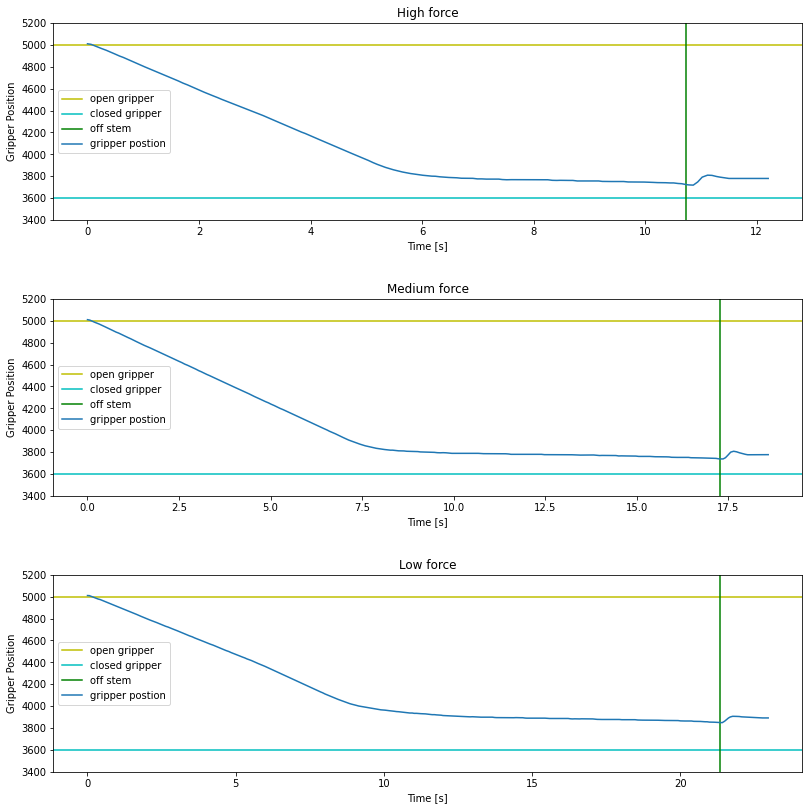

In [180]:
titles = ['High force', 'Medium force', 'Low force']
data = [gripper_posHwK2, gripper_posMwK2, gripper_posLwK2]
times = [time_vectorHwK2, time_vectorMwK2, time_vectorLwK2]
open_pos = 5000
closed_pos = 3600

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(13,13)
for i in range(3):
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    plottime = np.array(times[i])-times[i][0]
    axs[i].axvline(x = plottime[offstem_idx[i]], color = 'g',label='off stem')
    axs[i].plot(plottime, data[i], label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3400, 5200])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")
    # axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Arm z position

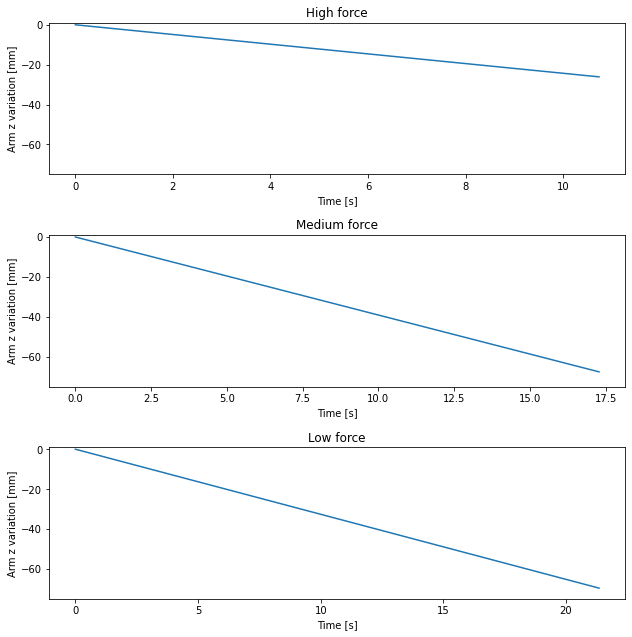

In [181]:
titles = ['High force', 'Medium force', 'Low force']
data = [z_posHwK2, z_posMwK2, z_posLwK2]
times = [time_vectorHwK2, time_vectorMwK2, time_vectorLwK2]

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot([plottime[0],plottime[offstem_idx[i]]], (np.array(data[i])-data[i][0])*1000, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Arm z variation [mm]")
    axs[i].set_ylim([-75, 1])
    axs[i].set_title(titles[i])
    # axs[i].legend(loc="center right")
    # axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Without controller 2

### Gripper pulling force

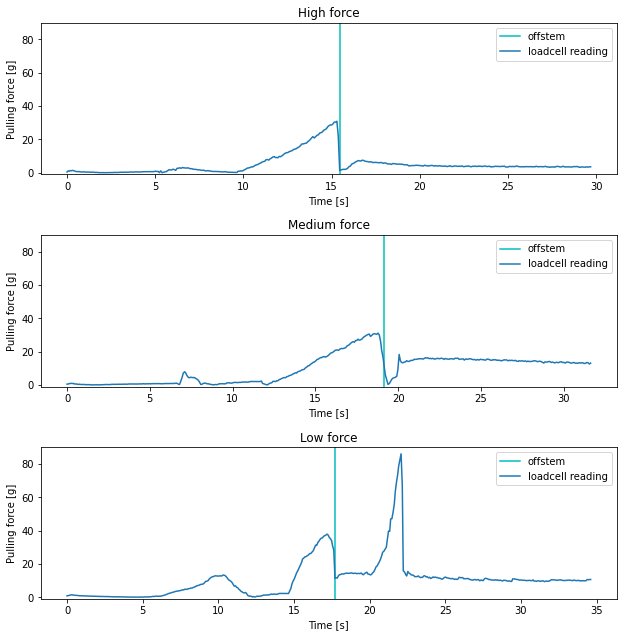

In [182]:
titles = ['High force', 'Medium force', 'Low force']
data = [pull_forceHwoK2, pull_forceMwoK2, pull_forceLwoK2]
times = [time_vectorHwoK2, time_vectorMwoK2, time_vectorLwoK2]
offstem_idx = []

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)
    plottime = np.array(times[i])-times[i][0]
    if i== 2:
        offstem = offstem_idxlow[2]
    axs[i].axvline(x = plottime[offstem], color = 'c', label='offstem')
    axs[i].plot(plottime, data[i],label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 90])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Gripper compressive force

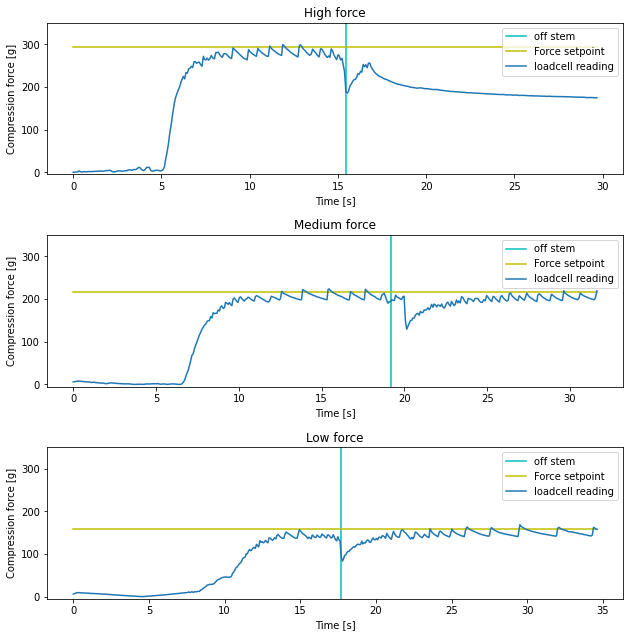

In [183]:
titles = ['High force', 'Medium force', 'Low force']
data = [comp_forceHwoK2, comp_forceMwoK2, comp_forceLwoK2]
times = [time_vectorHwoK2, time_vectorMwoK2, time_vectorLwoK2]

offstem_idxlow = []

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlow.append(offstem)
    plottime = np.array(times[i])-times[i][0]
    if i != 2:
        offstem = offstem_idx[i]
    axs[i].axvline(x = plottime[offstem], color = 'c',label='off stem')
    Fd_vector = np.ones_like(data[i])*Fd[i]
    # Fd_vector[offstem_idx[i]::] = 40
    # axs[i].axhline(y = Fd[i], color = 'y', label = 'axhline - full height')
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, data[i], label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 350])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Gripper position

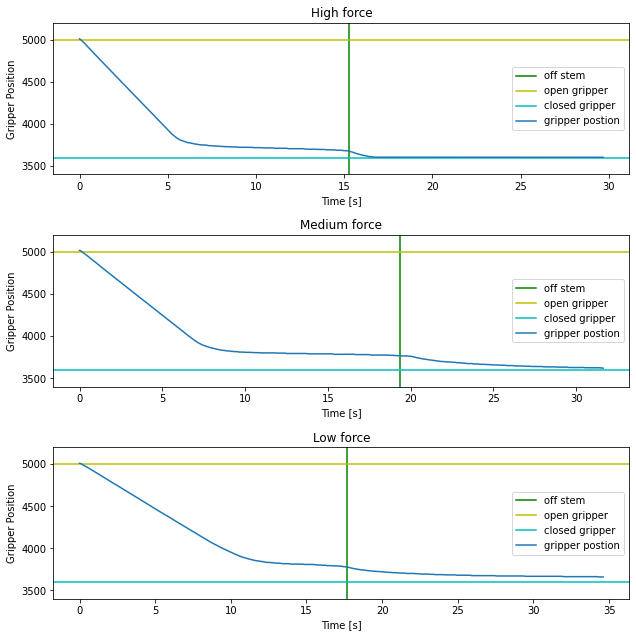

In [184]:
titles = ['High force', 'Medium force', 'Low force']
data = [gripper_posHwoK2, gripper_posMwoK2, gripper_posLwoK2]
times = [time_vectorHwoK2, time_vectorMwoK2, time_vectorLwoK2]
open_pos = 5000
closed_pos = 3600

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    if i != 2:
        offstem = offstem_idx[i]
    else:
        offstem = offstem_idxlow[i]
    axs[i].axvline(x = plottime[offstem], color = 'g',label='off stem')
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot(plottime, data[i], label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3400, 5200])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="center right")
    # axs[i].legend(loc="upper right")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Arm z position

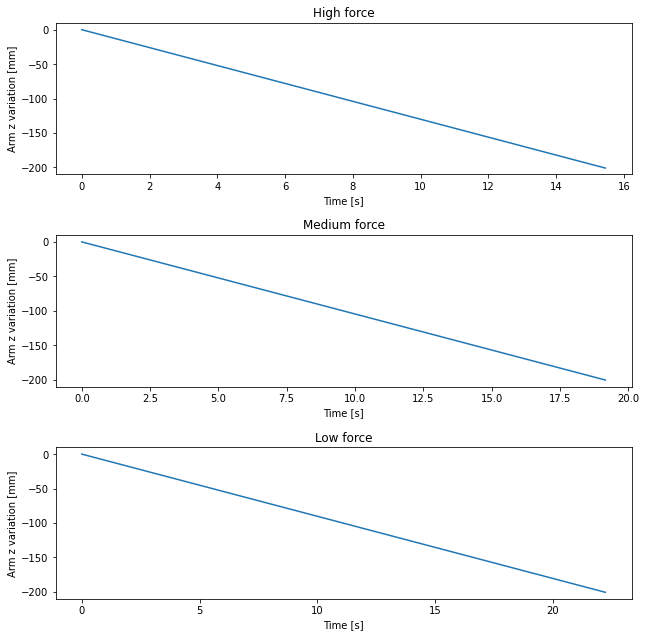

In [185]:
titles = ['High force', 'Medium force', 'Low force']
data = [z_posHwoK2, z_posMwoK2, z_posLwoK2]
times = [time_vectorHwoK2, time_vectorMwoK2, time_vectorLwoK2]

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(10,10)
for i in range(3):
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot([plottime[0],plottime[offstem_idx[i]]], (np.array(data[i])-data[i][0])*1000, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Arm z variation [mm]")
    axs[i].set_ylim([-210, 10])
    axs[i].set_title(titles[i])
    # axs[i].legend(loc="center right")
    # axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Remaining harvestign data

In [186]:
# os.chdir('Harvesting data day 2')
dir_2_29 = '2_29'
dir_2_38 = '2_38'
dir_2_39 = '2_39'
dir_2_40 = '2_40'
dirs = [dir_2_29, dir_2_38, dir_2_39, dir_2_40]
files = ['comp_force','Fd', 'gripper_pos', 'z_pos', 'pull_force','time_stamps', 'time_vector']

In [187]:
os.getcwd()

'd:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day 2\\Harvesting data day 2'

In [188]:
for j, directory in enumerate(dirs):
    for i, file in enumerate(os.listdir(directory)):
        locals()[files[i]+dirs[j]] = read_csv_file(directory+'/'+file)

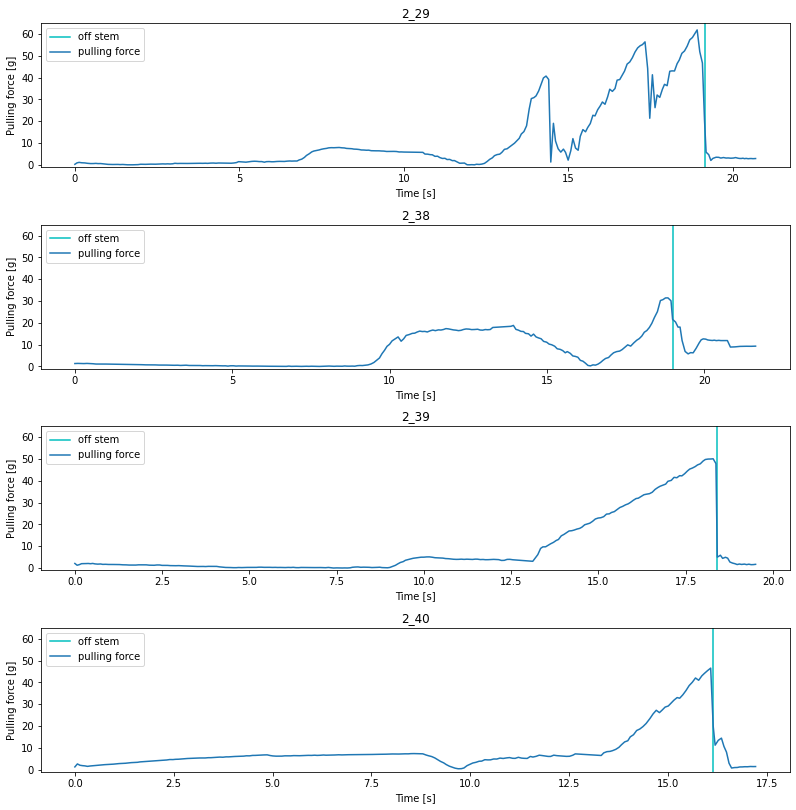

In [189]:
titles = ['2_29', '2_38', '2_39', '2_40']
data_pull = [pull_force2_29, pull_force2_38, pull_force2_39,pull_force2_40]
times = [time_vector2_29, time_vector2_38, time_vector2_39, time_vector2_40]
offstem_idx = []

data = data_pull

fig, axs = plt.subplots(len(data), 1)
fig.set_size_inches(13,13)
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)
    plottime = np.array(times[i])-times[i][0]
    if i == 0:
        offstem = 246
    axs[i].axvline(x = plottime[offstem], color = 'c',label='off stem')
    axs[i].plot(plottime, data[i], label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 65])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

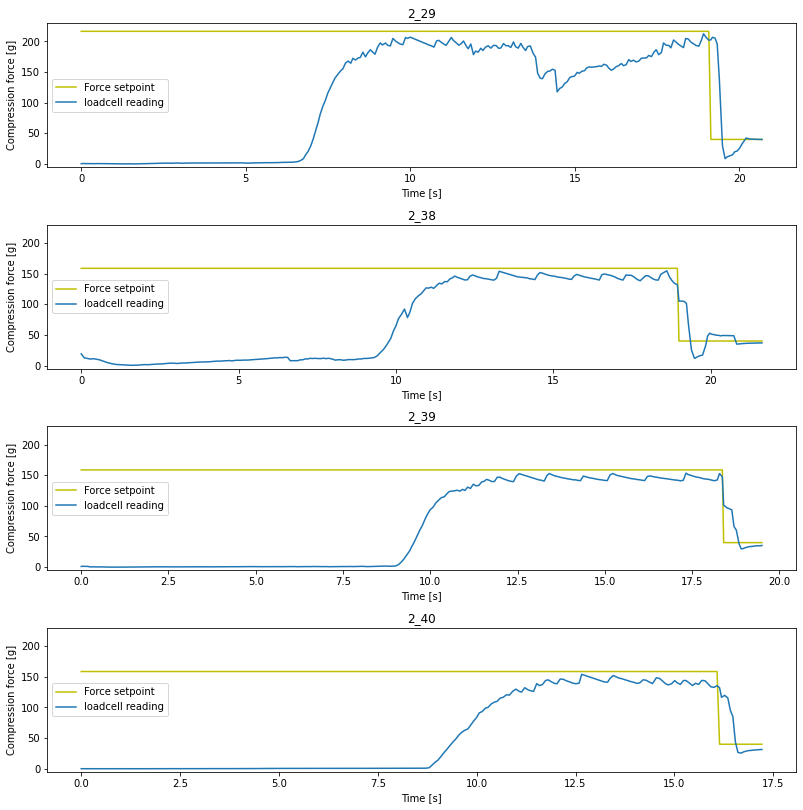

In [190]:
titles = ['2_29', '2_38', '2_39', '2_40']
data_comp = [comp_force2_29, comp_force2_38, comp_force2_39,comp_force2_40]
times = [time_vector2_29, time_vector2_38, time_vector2_39, time_vector2_40]
Fd = [Fd2_29, Fd2_38, Fd2_39, Fd2_40]

data = data_comp

offstem_idx2_29 = []

fig, axs = plt.subplots(len(data), 1)
fig.set_size_inches(13,13)
for i in range(len(data)):
    # dif_0 = 0
    # for idx in range(1,len(data[i])):
    #     dif = data[i][idx-1]-data[i][idx]
    #     if dif >= dif_0:
    #         dif_0 = dif
    #         offstem = idx
    # offstem_idx2_29.append(offstem)
    Fd_vector = np.ones_like(data[i])*Fd[i]
    if i != 0:
        offstem = offstem_idx[i]
    else:
        offstem = 246
    Fd_vector[offstem::] = 40
    # axs[i].axhline(y = Fd[i], color = 'y', label = 'axhline - full height')
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    axs[i].plot(plottime, data[i], label='loadcell reading')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-5, 230])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

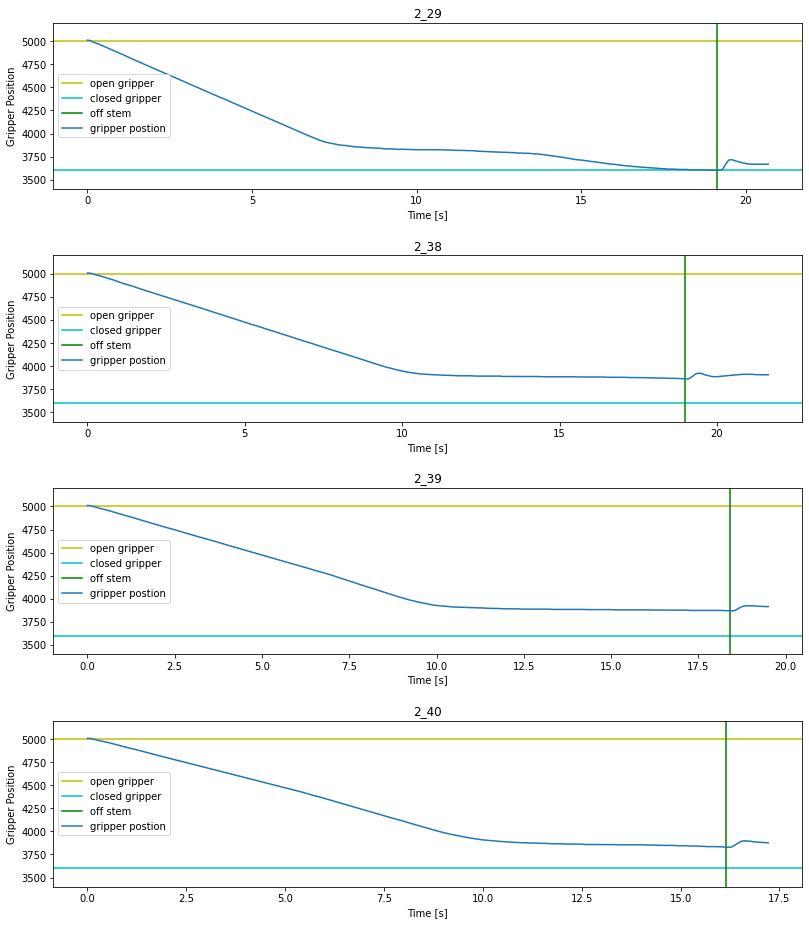

In [191]:
titles = ['2_29', '2_38', '2_39', '2_40']
data_pos = [gripper_pos2_29, gripper_pos2_38, gripper_pos2_39, gripper_pos2_40]
times = [time_vector2_29, time_vector2_38, time_vector2_39, time_vector2_40]
open_pos = 5000
closed_pos = 3600

data = data_pos

fig, axs = plt.subplots(len(data), 1)
fig.set_size_inches(13,15)
for i in range(len(data)):
    if i != 0:
        offstem = offstem_idx[i]
    else:
        offstem = 246
    axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
    axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
    plottime = np.array(times[i])-times[i][0]
    axs[i].axvline(x = plottime[offstem], color = 'g',label='off stem')
    axs[i].plot(plottime, data[i], label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Gripper Position")
    axs[i].set_ylim([3400, 5200])
    axs[i].set_title(titles[i])
    axs[i].legend(loc="center left")
    # axs[i].legend(loc="upper right")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

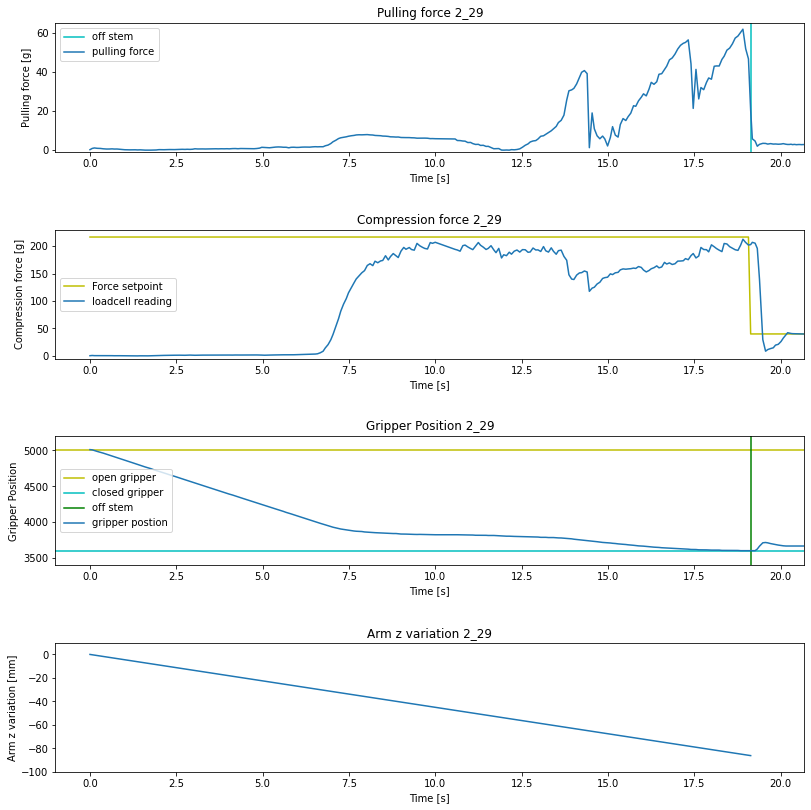

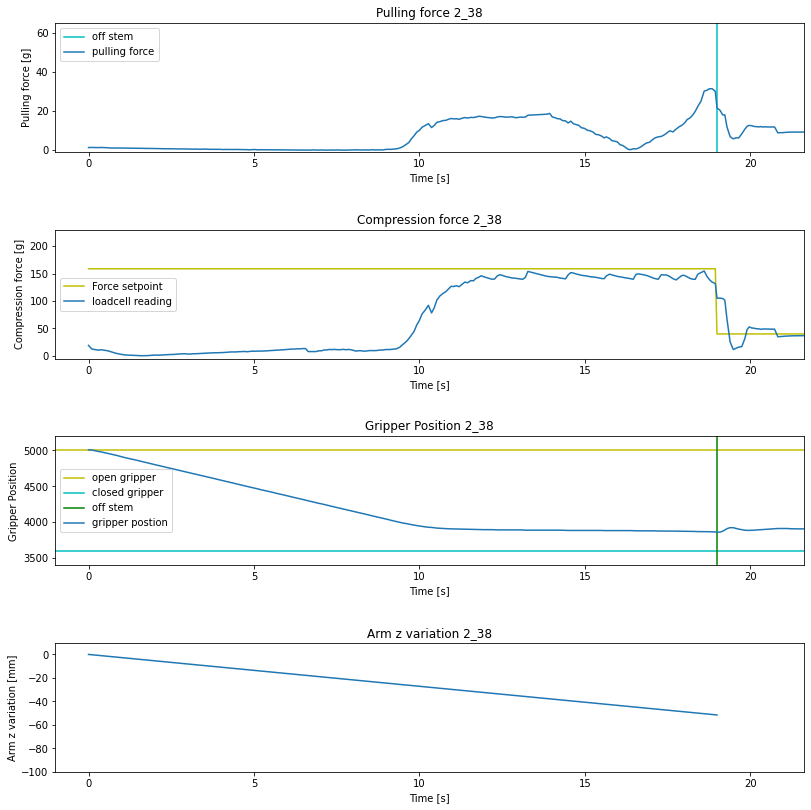

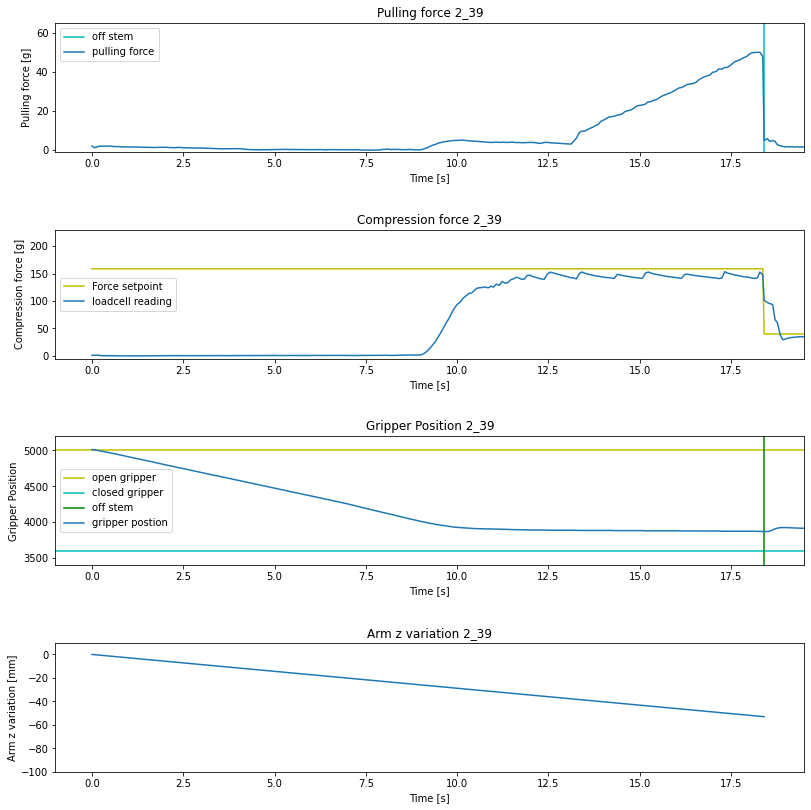

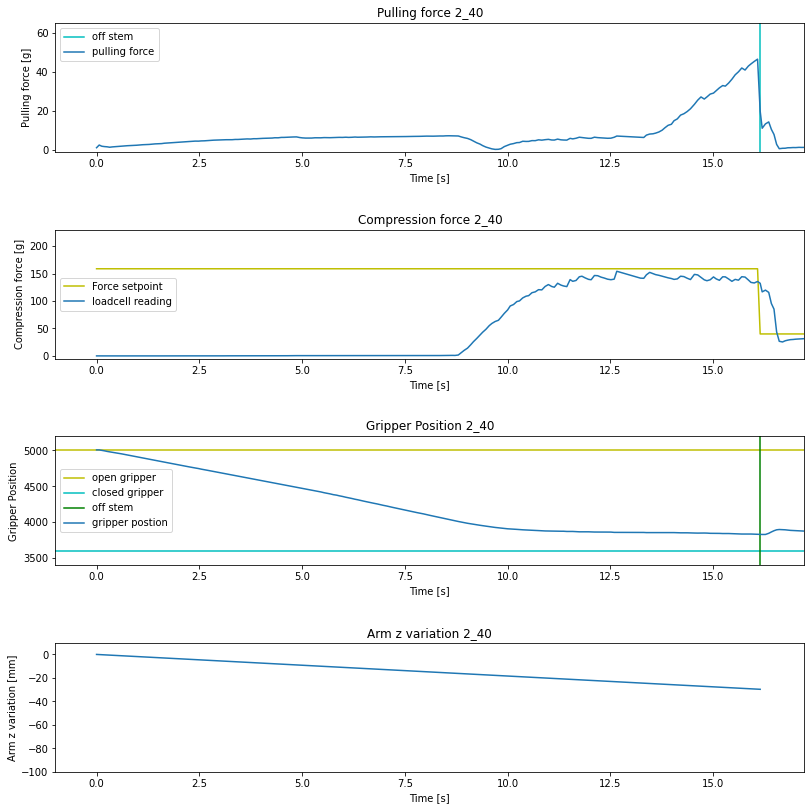

In [193]:
titles = ['2_29', '2_38', '2_39', '2_40']
data_pull = [pull_force2_29, pull_force2_38, pull_force2_39,pull_force2_40]
data_comp = [comp_force2_29, comp_force2_38, comp_force2_39,comp_force2_40]
data_pos = [gripper_pos2_29, gripper_pos2_38, gripper_pos2_39, gripper_pos2_40]
data_displacement = [z_pos2_29, z_pos2_38, z_pos2_39, z_pos2_40]
times = [time_vector2_29, time_vector2_38, time_vector2_39, time_vector2_40]

open_pos = 5000
closed_pos = 3600
# fig = [fig_1,fig_2,fig_3,fig_4]

for j in range(4):
    fig, axs = plt.subplots(4, 1)
    fig.set_size_inches(13,13)
    for i in range(4):
        if j != 0:
            offstem = offstem_idx[j]
        else:
            offstem = 246
        plottime = np.array(times[j])-times[j][0]
        if i == 0:
            data = data_pull.copy()
            axs[i].axvline(x = plottime[offstem], color = 'c',label='off stem')
            axs[i].plot(plottime, data[j], label='pulling force')
            axs[i].set_ylabel("Pulling force [g]")
            axs[i].set_ylim([-1, 65])
            axs[i].set_title("Pulling force "+titles[j])
            axs[i].legend(loc="upper left")
        if i == 1:
            data = data_comp.copy()
            Fd_vector = np.ones_like(data[j])*Fd[j]
            Fd_vector[offstem::] = 40
            # axs[i].axhline(y = Fd[i], color = 'y', label = 'axhline - full height')
            plottime = np.array(times[j])-times[j][0]
            axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
            axs[i].plot(plottime, data[j], label='loadcell reading')
            axs[i].set_ylabel("Compression force [g]")
            axs[i].set_ylim([-5, 230])
            axs[i].set_title("Compression force "+titles[j])
            axs[i].legend(loc="center left")
        if i == 2:
            data = data_pos.copy()
            axs[i].axhline(y = open_pos, color = 'y', label = 'open gripper')
            axs[i].axhline(y = closed_pos, color = 'c', label = 'closed gripper')
            axs[i].axvline(x = plottime[offstem], color = 'g',label='off stem')
            axs[i].plot(plottime, data[j], label='gripper postion')
            axs[i].set_ylabel("Gripper Position")
            axs[i].set_ylim([3400, 5200])
            axs[i].set_title("Gripper Position "+titles[j])
            axs[i].legend(loc="center left")
        if i == 3:
            data = data_displacement.copy()
            # data[j].append(data[j][0])
            axs[i].plot([plottime[0],plottime[offstem]], (np.array(data[j])-data[j][0])*1000, label='gripper postion')
            axs[i].set_ylabel("Arm z variation [mm]")
            axs[i].set_ylim([-100, 10])
            axs[i].set_title("Arm z variation "+titles[j])
        axs[i].set_xlabel('Time [s]')
        axs[i].set_xlim([-1, plottime[-1]])
        # axs[i].legend(loc="center right")
        # axs[i].legend(loc="upper right")

        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.6)